# "Why do we need nonlinear activation functions in a neural network ?"
> "Explaining why we need nonlinear activation fucntions and illutrating it with python code"

- toc:fasle
- branch: master
- badges: false
- comments: true
- author: Peiyi Hung
- categories: [learning, deep learning, machine learning, python, pytorch]
- image: 'images/nonlinear.png'

# Introduction

A neural network is composed of neurons. A neuron usually multiplies inputs values by weights, adds a bias to the product of weights and inputs, and passes the sum into a nonlinear activation function. In an equation form, the computation a neuron does is 
$$a = f(\sum_{j=1}^{n}{w_jx_j} + b)$$
where $f$ is a nonlinear function such as tanh or ReLU, $w_j$ are weights, and $b$ is a bias. 

The question I intended to answer in this article is **why we need a nonlinear activation function**. 

We need a nonlinear function because **our model would only learn linear patterns if we don't use one.** I will illustrate this point by comparing two simple neural networks, one with nonlinear activation functions and the other without nonlinear functions. I will fit these two models to the data I generate from a nonlinear function and show you that the model without nonlinear functions can not capture a nonlinear pattern. 

The illustration starts with generating data, proceeds with building and training models, and ends with comparing prediction performances of two models.  Let's get started!

# Generating data

In [1]:
#collapse-hide
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 5)
plt.style.use('fivethirtyeight')

The data is generated from this equation:
$$y = x^2 + 4x + 3 + \epsilon, \: \epsilon \sim N(0, 50)$$
where $y$ is a quadratic function adding a normally distributed error term $\epsilon$. We want our model to approximate this function.

Here's how the data looks like: 

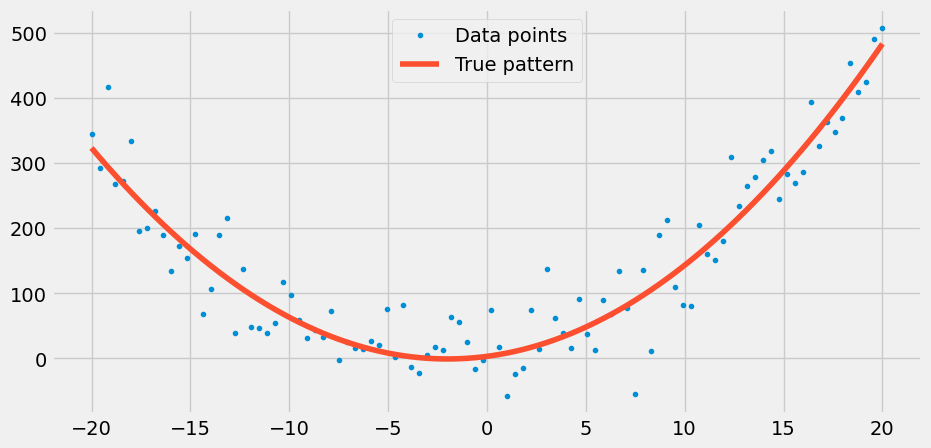

In [4]:
np.random.seed(5)
x = np.linspace(-20, 20, 100) # independent variable
y = x**2 + 4*x + 3 + np.random.randn(100)*50 # dependent variable

plt.figure(dpi=100)
plt.plot(x, y, ".", label="Data points")
plt.plot(x, 3 + x**2 + 4*x, "-", label="True pattern")
plt.legend(loc="upper center");

# Build and Train Neural Networks

I contruct two neural networks with similar architecture. They are fully-connected networks with 4 hidden layers and 8 hidden units in each layer like this:

![](images/nn.png)

The only difference is activation functions. One uses identity functions $f(x)=x$ and the other is equipped with ReLU functions $ReLU(x)=max(0, x)$.

The networks are contructed with PyTroch:

In [3]:
import torch
from torch import nn
from torch.utils.data import DataLoader

# transfer numpy array to pytorch tennsor
x = torch.tensor(x).unsqueeze(1).float()
y = torch.tensor(y).unsqueeze(1).float()

# form dataset and dataloader
ds = [(xi, yi) for xi, yi in zip(x, y)]
dl = DataLoader(ds, batch_size=20, shuffle=True)

# the model without nonlinear function
model1 = nn.Sequential(
    nn.Linear(1, 8),
    nn.Linear(8, 8),
    nn.Linear(8, 8),
    nn.Linear(8, 8),
    nn.Linear(8, 1)
)

# the model with ReLU functions
model2 = nn.Sequential(
    nn.Linear(1, 8),
    nn.ReLU(),
    nn.Linear(8, 8),
    nn.ReLU(),
    nn.Linear(8, 8),
    nn.ReLU(),
    nn.Linear(8, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

I take the mean squared error as loss function and use Adam as the optimization method. Here's how I train these two models:

In [4]:
from torch import optim
import torch.nn.functional as F

# set loss functin and optimizatino method
loss_func = F.mse_loss
opt1 = optim.Adam(model1.parameters())
opt2 = optim.Adam(model2.parameters())

# training
lr = 5
for epoch in range(800):
    for xb, yb in dl:
        pred = model1(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        
        opt1.step()
        opt1.zero_grad()

for epoch in range(800):
    for xb, yb in dl:
        pred = model2(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        
        opt2.step()
        opt2.zero_grad()

# What's the difference between two models?

Now that these two model are trained we can see how they perform on capturing the nonlinear pattern.

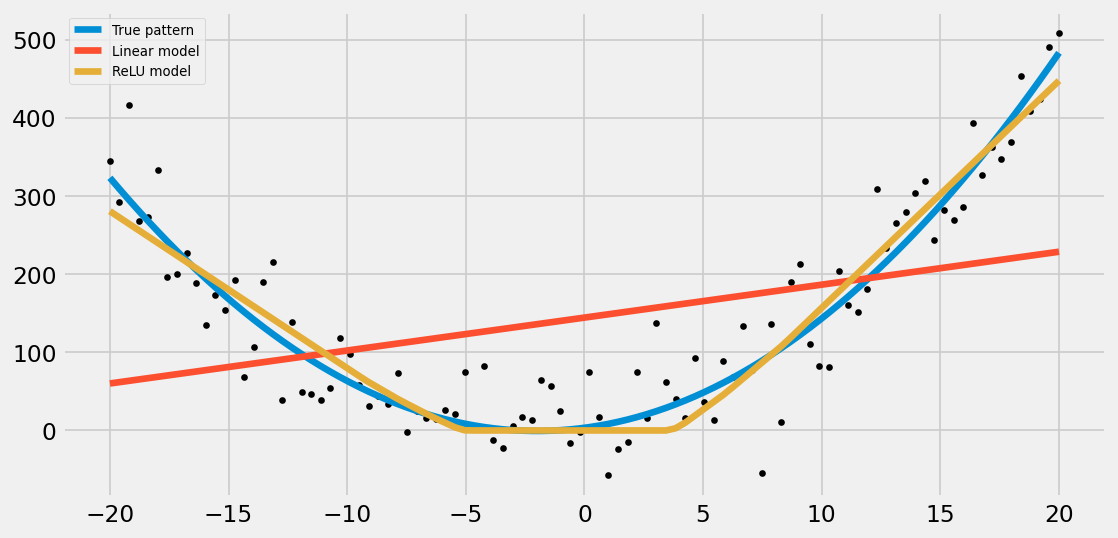

In [5]:
#collapse-hide
plt.figure(figsize=(10, 5), dpi=120)
plt.plot(x, y, "k.")
plt.plot(x, x**2 + 4*x + 3, label="True pattern")
plt.plot(x, model1(x).detach().numpy(), label="Linear model")
plt.plot(x, model2(x).detach().numpy(), label="ReLU model")
plt.legend(fontsize=8);

It is clear that the model with ReLU functions works better than the one without nonlinear functions. As suggested in the graph, model without nonlinear activation functions can only learn linear pattern. We will not encounter linear pattern every time when we analyze the data since the real world is so complex. Therefore, nonlinear activation functions are necessary for discovering the underlying pattern of the data.